In [3]:
import os
os.chdir('/home/angel/Downloads/ProjetI&A')

First of all we import the libraries which will help us building the cnn, the first two are for building the neural network while the two left will help for the convolution part

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


Now we initialize our neural network

In [3]:
classifier=Sequential()

we have 32 features dectectors and each detector have a 3x3 size
relu is used to remove the linearity, we need to specify the format of images (64x64 pixels + RGB channels)
stride default value is 1

In [4]:
classifier.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))

The default value of the stride is 2
Goal : reduce the size of the feature maps in order to reduce the processing while keeping the important info (features)

In [5]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

We add another layer to our cnn

In [6]:
classifier.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

As the name of this step implies, we are literally going to flatten our pooled feature map into a column like in the image below.

In [7]:
classifier.add(Flatten())

We build our typical artificial neural network (Ann)

In [8]:
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

Now it's time to compile our cnn

In [9]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [96]:
from keras.preprocessing.image import ImageDataGenerator

In [97]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'Train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'Test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

classifier.fit_generator(
        training_set,
        steps_per_epoch=(162080/32),
        epochs=5,
        validation_data=test_set,
        validation_steps=(40520/32))

Found 162080 images belonging to 2 classes.
Found 40520 images belonging to 2 classes.


In [12]:
classifier.save('my_CelebA_model.h5')

In [4]:
from keras.models import load_model
model = load_model('my_CelebA_model.h5')

In [14]:
model.summary()

000006.jpg     h.jpeg				test3.jpg
000013.jpg     img_align_celeba			test4.jpg
000015.jpg     img_align_celeba.zip		test.jpg
000017.jpg     list_attr_celeba.csv		T.jpg
000018.jpg     list_bbox_celeba.csv		Train
000021.jpg     list_eval_partition.csv		x_test_non.csv
000024.jpg     list_landmarks_align_celeba.csv	x_test_oui.csv
000029.jpg     my_CelebA_model.h5		x_train_non.csv
001736.jpg     si.jpg				x_train_oui.csv
angel_con.jpg  Test
angel_sin.jpg  test2.jpg


In [25]:
tff,tfv,tvv,tvf=0,0,0,0

In [26]:
import glob
list_absence=glob.glob("/home/angel/Downloads/ProjetI&A/Test/Absence_of_feature/*.jpg")
list_presence=glob.glob("/home/angel/Downloads/ProjetI&A/Test/Presence_of_feature/*.jpg")

In [27]:
training_set.class_indices

NameError: name 'training_set' is not defined

In [28]:
#Getting the Confusion Matrix
from keras.preprocessing import image
import numpy as np
for img in list_absence:
    imge = image.load_img(img, target_size=(64, 64))
    x = image.img_to_array(imge)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    if classes[0][0]==0:
        tff=tff+1
    else:
        tfv=tfv+1

In [145]:
abse=[]
for img in list_presence:
    imge = image.load_img(img, target_size=(64, 64))
    x = image.img_to_array(imge)
    x = np.expand_dims(x, axis=0)
    abse.append(x)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    if classes[0][0]==1:
        tvv=tvv+1
    else:
        tvf=tvf+1

In [67]:
##FALSE NEGATIVES
tfv

568

In [68]:
##TRUE POSITIVES
tvv

16568

In [32]:
##FALSE POSITIVES
tvf

175

In [6]:
##TRUE NEGATIVES
!tff

000006.jpg     h.jpeg				test3.jpg
000013.jpg     img_align_celeba			test4.jpg
000015.jpg     img_align_celeba.zip		test.jpg
000017.jpg     list_attr_celeba.csv		T.jpg
000018.jpg     list_bbox_celeba.csv		Train
000021.jpg     list_eval_partition.csv		x_test_non.csv
000024.jpg     list_landmarks_align_celeba.csv	x_test_oui.csv
000029.jpg     my_CelebA_model.h5		x_train_non.csv
001736.jpg     si.jpg				x_train_oui.csv
angel_con.jpg  Test
angel_sin.jpg  test2.jpg


In [54]:
#testing the model with an image from outside the given dataset
imge = image.load_img("angel_sin.jpg", target_size=(64, 64))
x = image.img_to_array(imge)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
if classes[0][0]==1:
    print("yes")
else:
    print("no")

yes


Text(0.5,0,'Is using glasses 100%')

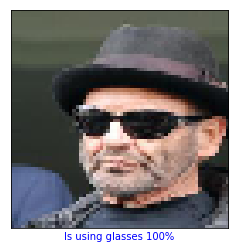

In [158]:
#Plotting some images from Test dataset
imge = image.load_img("001096.jpg", target_size=(64, 64))
x = image.img_to_array(imge)
x = np.expand_dims(x, axis=0)
img = np.vstack([x])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imge,cmap=plt.cm.binary)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
prob=model.predict(images)
if classes[0][0]==1:
    res="Is using glasses"
    color='blue'
else:
    res="Is not using glasses"
    color='red'
plt.xlabel("{} {:2.0f}%".format(res,100*np.max(prob)),color=color)


Text(0.5,0,'Is using glasses 100%')

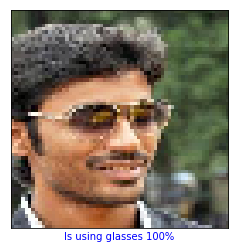

In [159]:
imge = image.load_img("001052.jpg", target_size=(64, 64))
x = image.img_to_array(imge)
x = np.expand_dims(x, axis=0)
img = np.vstack([x])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imge,cmap=plt.cm.binary)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
prob=model.predict(images)
if classes[0][0]==1:
    res="Is using glasses"
    color='blue'
else:
    res="Is not using glasses"
    color='red'
plt.xlabel("{} {:2.0f}%".format(res,100*np.max(prob)),color=color)

Text(0.5,0,'Is using glasses 100%')

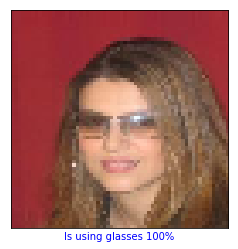

In [160]:
imge = image.load_img("001736.jpg", target_size=(64, 64))
x = image.img_to_array(imge)
x = np.expand_dims(x, axis=0)
img = np.vstack([x])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imge,cmap=plt.cm.binary)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
prob=model.predict(images)
if classes[0][0]==1:
    res="Is using glasses"
    color='blue'
else:
    res="Is not using glasses"
    color='red'
plt.xlabel("{} {:2.0f}%".format(res,100*np.max(prob)),color=color)

Text(0.5,0,'Is using glasses 100%')

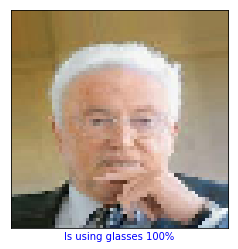

In [161]:
imge = image.load_img("000958.jpg", target_size=(64, 64))
x = image.img_to_array(imge)
x = np.expand_dims(x, axis=0)
img = np.vstack([x])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imge,cmap=plt.cm.binary)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
prob=model.predict(images)
if classes[0][0]==1:
    res="Is using glasses"
    color='blue'
else:
    res="Is not using glasses"
    color='red'
plt.xlabel("{} {:2.0f}%".format(res,100*np.max(prob)),color=color)